<a href="https://colab.research.google.com/github/MorkSunhout/cats-and-dogs-classification/blob/main/cats_and_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [2]:
# make a directory for Kaggle
!mkdir -p ~/.kaggle


In [3]:
# move kaggle.json and set permission
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download salader/dogs-vs-cats -p /content


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 94% 1.00G/1.06G [00:08<00:00, 291MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [5]:
!unzip -q /content/dogs-vs-cats.zip -d /content/dogs-vs-cats


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
# generator

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

validate_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validate_ds = validate_ds.map(process)

In [9]:
#model architecture

model = Sequential([
    Conv2D(32, kernel_size = (3, 3),padding = 'valid', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# learning

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [12]:
# train

history = model.fit(
    train_ds,
    validation_data=validate_ds,
    epochs=10
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5601 - loss: 0.6952 - val_accuracy: 0.7018 - val_loss: 0.5767
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7127 - loss: 0.5592 - val_accuracy: 0.7420 - val_loss: 0.5701
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7999 - loss: 0.4260 - val_accuracy: 0.7564 - val_loss: 0.6472
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 73ms/step - accuracy: 0.8957 - loss: 0.2480 - val_accuracy: 0.7528 - val_loss: 0.9254
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.9545 - loss: 0.1188 - val_accuracy: 0.7478 - val_loss: 1.2209
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9761 - loss: 0.0675 - val_accuracy: 0.7440 - val_loss: 1.1908
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.9852 - loss: 0.0472 - val_accuracy: 0.7566 - val_loss: 1.4579
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9893 - loss: 0.0370 - 

In [13]:
import cv2
import matplotlib.pyplot as plt

#input the image
test_img = cv2.imread("/content/dogs-vs-cats/test/cats/cat.10007.jpg")

In [14]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

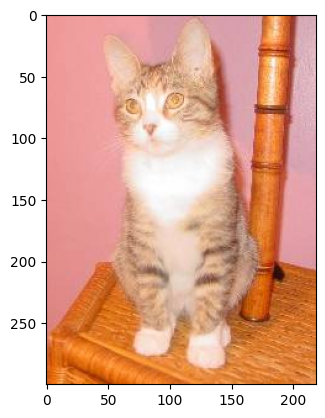

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(300, 219, 3)

In [17]:
test_img = cv2.resize(test_img, (256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [19]:
prediction = model.predict(test_input)

# Interpret result
if prediction[0][0] > 0.5:
    print("It's a Dog 🐶")
else:
    print("It's a Cat 🐱")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
It's a Cat 🐱
